In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from tqdm.notebook import tqdm
tqdm.pandas()

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 150)

In [2]:
url = 'https://finance.naver.com/sise/lastsearch2.naver'

In [3]:
print(url)
headers = {'user-agent' : 'Mozilla/5.0'}
print(headers['user-agent'])
response = requests.get(url,headers = headers)
response.status_code

https://finance.naver.com/sise/lastsearch2.naver
Mozilla/5.0


200

In [4]:
df_top_stocks = pd.read_html(response.text)[1]
df_top_stocks = df_top_stocks.dropna(how='all')
df_top_stocks = df_top_stocks.reset_index(drop=True)
df_top_stocks

,순위,종목명,검색비율,현재가,전일비,등락률,거래량,시가,고가,저가,PER,ROE
0,1.0,삼성전자,7.60%,64600.0,700.0,+1.10%,18154371.0,64400.0,65000.0,63900.0,10.48,13.92
1,2.0,카카오,2.20%,64700.0,1000.0,+1.57%,2579739.0,64000.0,65500.0,63400.0,18.55,17.10
2,3.0,코오롱인더우,1.80%,24000.0,50.0,-0.21%,10349.0,24150.0,24150.0,23800.0,4.39,NaN
3,4.0,엔에프씨,1.60%,9500.0,70.0,+0.74%,12948.0,9410.0,9580.0,9410.0,22.41,11.54
4,5.0,아프리카TV,1.40%,79700.0,500.0,-0.62%,135185.0,80300.0,80700.0,78900.0,12.49,39.90
5,6.0,미투젠,1.20%,13000.0,100.0,+0.78%,20539.0,12900.0,13080.0,12860.0,7.50,26.61
6,7.0,웹케시,1.20%,15600.0,100.0,-0.64%,12289.0,15850.0,15850.0,15540.0,19.26,17.87
7,8.0,에코프로에이치엔,1.00%,50000.0,500.0,+1.01%,167135.0,50600.0,51700.0,49700.0,36.02,NaN
8,9.0,TIGER 200 IT,1.00%,29965.0,250.0,+0.84%,49995.0,29715.0,30155.0,29675.0,NaN,NaN
9,10.0,KODEX 골드선물(H),1.00%,12670.0,155.0,-1.21%,235208.0,12710.0,12740.0,12640.0,NaN,NaN


In [5]:
# #contentarea > div.box_type_l > table > tbody > tr:nth-child(3) > td:nth-child(2) > a
find_tag = bs(response.text)
find_code = find_tag.select('td > a')

code = []
for i in find_tag.select('td > a'):
    code.append(i["href"].split("=")[-1])

print(code)
find_tag.select('td > a')

['005930', '035720', '120115', '265740', '067160', '950190', '053580', '383310', '139260', '132030', '051910', '041020', '038070', '009540', '000660', '278280', '275980', '233160', '006400', '352820', '28513K', '207940', '096770', '059090', '056190', '036890', '034730', '009830', '005380', '003670']


[<a class="tltle" href="/item/main.naver?code=005930">삼성전자</a>,
 <a class="tltle" href="/item/main.naver?code=035720">카카오</a>,
 <a class="tltle" href="/item/main.naver?code=120115">코오롱인더우</a>,
 <a class="tltle" href="/item/main.naver?code=265740">엔에프씨</a>,
 <a class="tltle" href="/item/main.naver?code=067160">아프리카TV</a>,
 <a class="tltle" href="/item/main.naver?code=950190">미투젠</a>,
 <a class="tltle" href="/item/main.naver?code=053580">웹케시</a>,
 <a class="tltle" href="/item/main.naver?code=383310">에코프로에이치엔</a>,
 <a class="tltle" href="/item/main.naver?code=139260">TIGER 200 IT</a>,
 <a class="tltle" href="/item/main.naver?code=132030">KODEX 골드선물(H)</a>,
 <a class="tltle" href="/item/main.naver?code=051910">LG화학</a>,
 <a class="tltle" href="/item/main.naver?code=041020">폴라리스오피스</a>,
 <a class="tltle" href="/item/main.naver?code=038070">서린바이오</a>,
 <a class="tltle" href="/item/main.naver?code=009540">한국조선해양</a>,
 <a class="tltle" href="/item/main.naver?code=000660">SK하이닉스</a>,
 <a class=

In [6]:
df_top_stocks["업종코드"] = code
df_top_stocks = df_top_stocks.drop("전일비", axis = 1)
df_top_stocks = df_top_stocks.drop("등락률", axis = 1)
df_top_stocks = df_top_stocks.drop("거래량", axis = 1)
df_top_stocks = df_top_stocks.drop("현재가", axis = 1)
df_top_stocks = df_top_stocks.drop("시가", axis = 1)
df_top_stocks = df_top_stocks.drop("고가", axis = 1)
df_top_stocks = df_top_stocks.drop("저가", axis = 1)
df_top_stocks = df_top_stocks.drop("PER", axis = 1)
df_top_stocks = df_top_stocks.drop("ROE", axis = 1)
df_top_stocks = df_top_stocks[["순위", "업종코드", "종목명", "검색비율"]]
df_top_stocks

,순위,업종코드,종목명,검색비율
0,1.0,005930,삼성전자,7.60%
1,2.0,035720,카카오,2.20%
2,3.0,120115,코오롱인더우,1.80%
3,4.0,265740,엔에프씨,1.60%
4,5.0,067160,아프리카TV,1.40%
5,6.0,950190,미투젠,1.20%
6,7.0,053580,웹케시,1.20%
7,8.0,383310,에코프로에이치엔,1.00%
8,9.0,139260,TIGER 200 IT,1.00%
9,10.0,132030,KODEX 골드선물(H),1.00%


In [7]:
stock_code = df_top_stocks["업종코드"][0]
stock_url = f"https://finance.naver.com/item/sise.naver?code={stock_code}"
stock_url

'https://finance.naver.com/item/sise.naver?code=005930'

In [8]:
response2 = requests.get(stock_url,headers = headers)
juyo_sise = pd.read_html(response2.text)[1]
juyo_sise = juyo_sise.dropna()
juyo_sise = juyo_sise.reset_index(drop=True)
juyo_sise

,0,1,2,3
0,현재가,64600,매도호가,64700
1,전일대비,상승 700,매수호가,64600
2,등락률(%),+1.10%,전일가,63900
3,거래량,18154371,시가,64400
4,거래대금(백만),1173645,고가,65000
5,액면가,100원,저가,63900
6,상한가,83000,전일상한,82400
7,하한가,44800,전일하한,44400
8,PER,10.48,EPS,6164
9,52주 최고,75800,52주 최저,51800


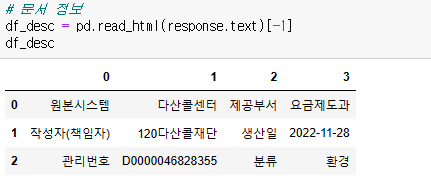
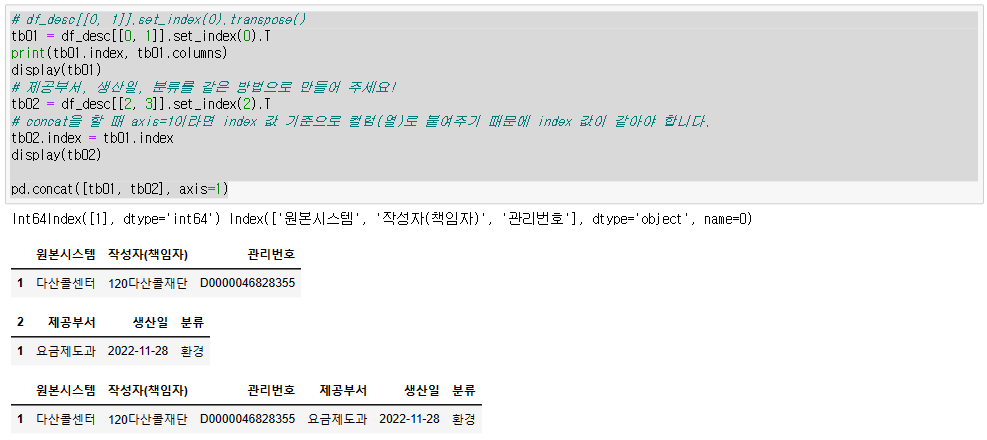

In [9]:
t1 = juyo_sise[[0,1]].set_index(0).T
t2 = juyo_sise[[2, 3]].set_index(2).T
t2.index = t1.index
juyo_sise = pd.concat([t1,t2], axis = 1)
juyo_sise

,현재가,전일대비,등락률(%),거래량,거래대금(백만),액면가,상한가,하한가,PER,52주 최고,시가총액,외국인현재,매도호가,매수호가,전일가,시가,고가,저가,전일상한,전일하한,EPS,52주 최저,상장주식수,자본금
1,64600,상승 700,+1.10%,18154371,1173645,100원,83000,44800,10.48,75800,"3,856,480억원","3,005,053천주",64700,64600,63900,64400,65000,63900,82400,44400,6164,51800,5969782550,"778,046백만"


# 여기부터 실행시키면 됩니다!

In [2]:
# 필요한 모듈 불러오기
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from tqdm.notebook import tqdm
tqdm.pandas()

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 150)

In [3]:
# 실시간 검색어 순위 가져오기
def get_top_stock():
    # url 생성
    url = 'https://finance.naver.com/sise/lastsearch2.naver'
    
    #response 받기
    headers = {'user-agent' : 'Mozilla/5.0'}
    response = requests.get(url,headers = headers)
    
    # 데이터 프레임 생성
    df_top_stocks = pd.read_html(response.text)[1]
    df_top_stocks = df_top_stocks.dropna(how='all')
    df_top_stocks = df_top_stocks.reset_index(drop=True)
    
    # 코드를 찾아서 추가하기
    find_tag = bs(response.text)   
    code = []
    for i in find_tag.select('td > a'):
        code.append(i["href"].split("=")[-1])
    
    # 불필요 데이터 제거 / 추후에 데이터를 추가 예정
    df_top_stocks["업종코드"] = code
    df_top_stocks = df_top_stocks.drop("전일비", axis = 1)
    df_top_stocks = df_top_stocks.drop("등락률", axis = 1)
    df_top_stocks = df_top_stocks.drop("거래량", axis = 1)
    df_top_stocks = df_top_stocks.drop("현재가", axis = 1)
    df_top_stocks = df_top_stocks.drop("시가", axis = 1)
    df_top_stocks = df_top_stocks.drop("고가", axis = 1)
    df_top_stocks = df_top_stocks.drop("저가", axis = 1)
    df_top_stocks = df_top_stocks.drop("PER", axis = 1)
    df_top_stocks = df_top_stocks.drop("ROE", axis = 1)
    df_top_stocks = df_top_stocks[["순위", "업종코드", "종목명", "검색비율"]]

    return df_top_stocks

In [4]:
# 가져온 순위를 다른 변수에 넣어줍니다. df_top_stocks은 아래에서 사용됩니다
df_top_stocks = get_top_stock()
get_top_stock()

,순위,업종코드,종목명,검색비율
0,1.0,005930,삼성전자,4.67%
1,2.0,035720,카카오,1.40%
2,3.0,009540,한국조선해양,1.05%
3,4.0,211900,KODEX 배당성장,0.82%
4,5.0,005380,현대차,0.70%
5,6.0,120115,코오롱인더우,0.58%
6,7.0,035420,NAVER,0.58%
7,8.0,000660,SK하이닉스,0.58%
8,9.0,122630,KODEX 레버리지,0.47%
9,10.0,051900,LG생활건강,0.47%


In [5]:
# 종목코드를 이용하여 시세 데이터 가져오기
def get_stock_sise(stock_code):
    # url 생성
    stock_url = f"https://finance.naver.com/item/sise.naver?code={stock_code}"
    headers = {'user-agent' : 'Mozilla/5.0'}
    
    #response 받기
    response2 = requests.get(stock_url,headers = headers)
    
    # 테이블 생성
    juyo_sise = pd.read_html(response2.text)[1]
    juyo_sise = juyo_sise.dropna()
    juyo_sise = juyo_sise.reset_index(drop=True)
    
    # 테이블 형태 변경
    t1 = juyo_sise[[0,1]].set_index(0).T
    t2 = juyo_sise[[2, 3]].set_index(2).T
    t2.index = t1.index
    juyo_sise = pd.concat([t1,t2], axis = 1)
   
    return juyo_sise

In [6]:
# 실시간 검색순위 별 데이터 수집
find_rank_stock = df_top_stocks['업종코드'].progress_map(get_stock_sise)
find_rank_stock = pd.concat(find_rank_stock.tolist(), ignore_index=True)
find_rank_stock

  0%|          | 0/30 [00:00<?, ?it/s]

,현재가,전일대비,등락률(%),거래량,거래대금(백만),액면가,상한가,하한가,PER,52주 최고,시가총액,외국인현재,매도호가,매수호가,전일가,시가,고가,저가,전일상한,전일하한,EPS,52주 최저,상장주식수,자본금,거래대금(천)
0,64600,상승 700,+1.10%,18154371,1173645,100원,83000,44800,10.48,75800,"3,856,480억원","3,005,053천주",64700,64600,63900,64400,65000,63900,82400,44400,6164,51800,5969782550,"778,046백만",NaN
1,64700,"상승 1,000",+1.57%,2579739,166491,100원,82800,44600,18.55,110000,"288,189억원","117,917천주",64800,64700,63700,64000,65500,63400,81300,43900,3488,46500,445423689,"44,592백만",NaN
2,78800,"상승 1,900",+2.47%,281131,22190,"5,000원",99900,53900,-8.71,101500,"55,769억원","14,320천주",78800,78700,76900,77100,79800,76700,99000,53400,-9044,68100,70773116,"353,865백만",NaN
3,13460,상승 70,+0.52%,12794,172,NaN,17405,9375,NaN,15005,182억원,2천주,13490,13460,13390,13500,13520,NaN,17300,9320,NaN,11520,1350000,0백만,NaN
4,173900,"하락 1,000",-0.57%,1149932,201707,"5,000원",227000,122500,7.76,203500,"371,569억원","62,406천주",173900,173800,174900,177000,177600,173300,215000,116000,22413,150500,213668187,"1,157,982백만",NaN
5,24000,하락 50,-0.21%,10349,247,"5,000원",31250,16850,4.39,32700,664억원,328천주,24000,23950,24050,24150,24150,23800,31250,16850,5466,22650,2767860,"13,839백만",NaN
6,211500,"상승 7,500",+3.68%,1210129,252296,100원,265000,143000,37.26,348000,"346,964억원","79,431천주",211500,211000,204000,204500,211500,202000,262500,141500,5676,155000,164049085,"16,481백만",NaN
7,91500,하락 800,-0.87%,2328218,213608,"5,000원",119900,64700,7.18,134000,"666,122억원","369,552천주",91500,91400,92300,91300,92800,90300,118800,64000,12738,73100,728002365,"3,657,652백만",NaN
8,16120,상승 265,+1.67%,30483375,490547,NaN,25365,6345,NaN,21275,"20,343억원","1,616천주",16125,16120,15855,15900,16315,NaN,24675,6175,NaN,11630,126200000,0백만,NaN
9,759000,"상승 32,000",+4.40%,102710,76778,"5,000원",945000,509000,27.87,1045000,"118,542억원","5,676천주",759000,758000,727000,728000,765000,723000,951000,513000,27231,499500,15618197,"78,090백만",NaN


In [7]:
# 실시간 검색순위와 시세 데이터 합치기
final_data = pd.concat([df_top_stocks,find_rank_stock], axis = 1)
final_data

,순위,업종코드,종목명,검색비율,현재가,전일대비,등락률(%),거래량,거래대금(백만),액면가,상한가,하한가,PER,52주 최고,시가총액,외국인현재,매도호가,매수호가,전일가,시가,고가,저가,전일상한,전일하한,EPS,52주 최저,상장주식수,자본금,거래대금(천)
0,1.0,005930,삼성전자,4.67%,64600,상승 700,+1.10%,18154371,1173645,100원,83000,44800,10.48,75800,"3,856,480억원","3,005,053천주",64700,64600,63900,64400,65000,63900,82400,44400,6164,51800,5969782550,"778,046백만",NaN
1,2.0,035720,카카오,1.40%,64700,"상승 1,000",+1.57%,2579739,166491,100원,82800,44600,18.55,110000,"288,189억원","117,917천주",64800,64700,63700,64000,65500,63400,81300,43900,3488,46500,445423689,"44,592백만",NaN
2,3.0,009540,한국조선해양,1.05%,78800,"상승 1,900",+2.47%,281131,22190,"5,000원",99900,53900,-8.71,101500,"55,769억원","14,320천주",78800,78700,76900,77100,79800,76700,99000,53400,-9044,68100,70773116,"353,865백만",NaN
3,4.0,211900,KODEX 배당성장,0.82%,13460,상승 70,+0.52%,12794,172,NaN,17405,9375,NaN,15005,182억원,2천주,13490,13460,13390,13500,13520,NaN,17300,9320,NaN,11520,1350000,0백만,NaN
4,5.0,005380,현대차,0.70%,173900,"하락 1,000",-0.57%,1149932,201707,"5,000원",227000,122500,7.76,203500,"371,569억원","62,406천주",173900,173800,174900,177000,177600,173300,215000,116000,22413,150500,213668187,"1,157,982백만",NaN
5,6.0,120115,코오롱인더우,0.58%,24000,하락 50,-0.21%,10349,247,"5,000원",31250,16850,4.39,32700,664억원,328천주,24000,23950,24050,24150,24150,23800,31250,16850,5466,22650,2767860,"13,839백만",NaN
6,7.0,035420,NAVER,0.58%,211500,"상승 7,500",+3.68%,1210129,252296,100원,265000,143000,37.26,348000,"346,964억원","79,431천주",211500,211000,204000,204500,211500,202000,262500,141500,5676,155000,164049085,"16,481백만",NaN
7,8.0,000660,SK하이닉스,0.58%,91500,하락 800,-0.87%,2328218,213608,"5,000원",119900,64700,7.18,134000,"666,122억원","369,552천주",91500,91400,92300,91300,92800,90300,118800,64000,12738,73100,728002365,"3,657,652백만",NaN
8,9.0,122630,KODEX 레버리지,0.47%,16120,상승 265,+1.67%,30483375,490547,NaN,25365,6345,NaN,21275,"20,343억원","1,616천주",16125,16120,15855,15900,16315,NaN,24675,6175,NaN,11630,126200000,0백만,NaN
9,10.0,051900,LG생활건강,0.47%,759000,"상승 32,000",+4.40%,102710,76778,"5,000원",945000,509000,27.87,1045000,"118,542억원","5,676천주",759000,758000,727000,728000,765000,723000,951000,513000,27231,499500,15618197,"78,090백만",NaN


In [8]:
final_data.to_csv('1월 29일 네이버 증권 실시간 검색순위.csv',index=False, encoding="utf-8-sig")